<h1> Busca em Largura Simples

In [ ]:
from graphviz import Graph
#biblioteca para importar gráfico

In [ ]:
class Vertice: #nó do grafo no processo de busca
  def __init__(self,rotulo):
    self.rotulo = rotulo
    #função construtora
  def __eq__(self,outro):
      return outro.rotulo == self.rotulo
    #sobrecarga de operadores (comparar um vertice com o outro)
  def __repr__(self):
      return self.rotulo
    #criar mecanismo de representação do vertice
  def __hash__(self):
      return hash(self.rotulo)
    #criar um numero inteiro para associar com a string

In [ ]:
class Mapa: 
  def __init__(self):
      self.listaAdjacencias = dict()
      self.listaVertices = set() #nao admite repetições 
      #funcao construtora para criar uma lista de adjacencias e de vertices para cada vertices
  def adicionaVertice(self,rotulo):
      self.listaVertices.add(Vertice(rotulo))
      #para adicionar determinado vertice com determinado rotulo no grafo
  def localizaRotulo(self,rotulo):
      for i in self.listaVertices:
          if i.rotulo == rotulo:
              return i
      return -1
     #vai pesquisar em todos os vertices onde tem um vertice especifico e retorna a posição dele, caso nao encontra retorna '-1'
  def adicionaArco(self,r1,r2):
      if not self.listaAdjacencias.get(r1):
          self.listaAdjacencias[r1] = [r2]
      else:
          self.listaAdjacencias[r1].append(r2)

      if not self.listaAdjacencias.get(r2):
          self.listaAdjacencias[r2] = [r1]
      else: 
          self.listaAdjacencias[r2].append(r1)
     #conecta um vertice a outro
  def __repr__(self):
      return str(self.listaAdjacencias)
     #transforma o grafo em string
  def desenhaGrafo(self):
      g = Graph(comment = 'São Paulo Metropolitana',strict=True)
      for i in self.listaVertices:
          g.node(i.rotulo,i.rotulo,fontsize="10")
      for k,v in self.listaAdjacencias.items():
          for j in v:
              g.edge(k,j,dir="none") 
      return g 

<h3> Construindo e plotando o Grafo

In [ ]:
mp = Mapa() #valores ficticios 

mp.adicionaVertice('SÃO PAULO')
mp.adicionaVertice('DIADEMA')
mp.adicionaVertice('GUARULHOS')
mp.adicionaVertice('SANTO ANDRÉ')
mp.adicionaVertice('SÃO CAETANO DO SUL')
mp.adicionaVertice('SÃO BERNARDO DO CAMPO')
mp.adicionaVertice('BARUERI')
mp.adicionaVertice('OSASCO')
mp.adicionaVertice('MAUÁ')
mp.adicionaVertice('COTIA')
mp.adicionaVertice('GUARULHOS')
mp.adicionaVertice('POÁ')

mp.adicionaArco('SÃO PAULO','DIADEMA')
mp.adicionaArco('SÃO PAULO','GUARULHOS')
mp.adicionaArco('SÃO PAULO','SANTO ANDRÉ')
mp.adicionaArco('SÃO PAULO','SÃO BERNARDO DO CAMPO')
mp.adicionaArco('SÃO PAULO','BARUERI')

mp.adicionaArco('DIADEMA','OSASCO')
mp.adicionaArco('DIADEMA','MOGI DAS CRUZES')
mp.adicionaArco('DIADEMA','MAUÁ')

mp.adicionaArco('GUARULHOS','MAUÁ')
mp.adicionaArco('GUARULHOS','SANTO ADNRÉ')

mp.adicionaArco('SANTO ADNRÉ','SÃO CAETANO DO SUL')

mp.adicionaArco('SÃO BERNARDO DO CAMPO','POÁ')
mp.adicionaArco('SÃO BERNARDO DO CAMPO','COTIA')

mp.adicionaArco('BARUERI','POÁ')


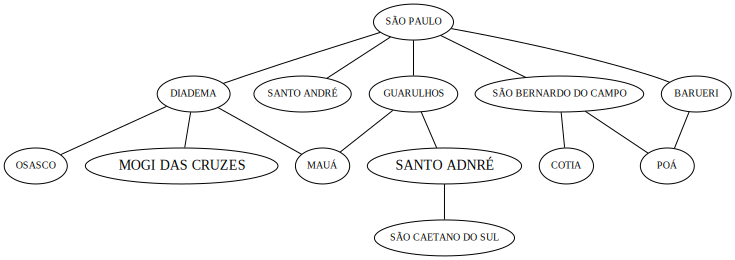

In [ ]:
mp.desenhaGrafo()

In [ ]:
def buscaCidades(grafo,inicio,meta):
  border = [[inicio]]
  visited = set()
  while border:
    #pega o primeiro caminho na fila
    route = border.pop(0)

    v = route[-1]
    #pega o ultimo nó no caminho

    if v == meta:
      return route
      #teste de meta
      #checar se o nó atual ja foi visitado
    elif v not in visited:
      for neighbour in grafo.listaAdjacencias.get(v):
        newRoute = list(route)
        newRoute.append(neighbour)
        border.append(newRoute)
        #pega nos adjacentes, constroi um caminho e poe na fila

        if neighbour == meta: #teste de meta
          return newRoute
         
      visited.add(v)
      #coloca o vertice na lista de visitados

In [ ]:
print(buscaCidades(mp,'SÃO PAULO', 'SANTO ANDRÉ'))
print(buscaCidades(mp,'COTIA','SÃO BERNARDO DO CAMPO'))
print(buscaCidades(mp,'MOGI DAS CRUZES','SÃO PAULO'))
print(buscaCidades(mp,'SÃO PAULO','SÃO CAETANO DO SUL'))
print(buscaCidades(mp, 'SÃO PAULO', 'MAUÁ'))

['SÃO PAULO', 'SANTO ANDRÉ']
['COTIA', 'SÃO BERNARDO DO CAMPO']
['MOGI DAS CRUZES', 'DIADEMA', 'SÃO PAULO']
['SÃO PAULO', 'GUARULHOS', 'SANTO ADNRÉ', 'SÃO CAETANO DO SUL']
['SÃO PAULO', 'DIADEMA', 'MAUÁ']
